In [4]:
from pytrends.request import TrendReq

pytrends = TrendReq(hl='en-US', tz=360)

In [3]:
pip install pytrends

  Obtaining dependency information for pytrends from https://files.pythonhosted.org/packages/68/ba/7a24a3723c790000faf880505ff1cc46f4d29f46dd353037938a070c4d23/pytrends-4.9.2-py3-none-any.whl.metadata
Note: you may need to restart the kernel to use updated packages.


In [148]:
from pathlib import Path

from zipfile import ZipFile
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.decomposition import TruncatedSVD
from sklearn.preprocessing import Normalizer
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
import nltk
from nltk import word_tokenize          
from nltk.stem.snowball import EnglishStemmer 
import matplotlib.pylab as plt

import dmba
from dmba import printTermDocumentMatrix, classificationSummary, liftChart

nltk.download('punkt')

%matplotlib inline

no display found. Using non-interactive Agg backend


[nltk_data] Downloading package punkt to
[nltk_data]     /Users/MatthewCozetti/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [51]:
import pandas as pd

# Create a dictionary to store the table data
table_data = {
    'Variable': ['Age in years', 'Gender', 'Highest education level', 'Current living situation', 'Food purchasing responsibility',
                 'Food preparation/cooking responsibility', 'Special dietary requirements', 'Sport', 'Highest level of participation',
                 'Years competing at Tier 3 or Tier 4'],
    'Participants, n (%)': [('22.0 (18, 27)',), ('Female: 68 (54.8)', 'Male: 50 (40.3)', 'Not answered: 6 (4.8)'),
                            ('School ≤ year 11: 4 (3.2)', 'School year 12 or 13: 40 (32.3)', 'Polytechnic or apprenticeship: 4 (3.2)',
                             'University: 69 (55.6)', 'Not answered: 7 (5.6)'),
                            ('With family: 48 (38.7)', 'With partner/spouse: 31 (25.0)', 'With housemates: 29 (23.4)', 'Alone: 6 (4.8)',
                             'Boarding school/hostel: 4 (3.2)', 'Not answered: 6 (4.8)'),
                            ('Self: 51 (41.1)', 'Another household member: 29 (23.4)', 'Shared responsibility: 34 (27.4)',
                             'Food service organization: 4 (3.2)', 'Not answered: 6 (4.8)'),
                            ('Self: 47 (37.9)', 'Another household member: 14 (11.3)', 'Shared responsibility: 54 (43.5)',
                             'Food service organization: 3 (2.4)', 'Not answered: 6 (4.8)'),
                            ('Yes: 24 (19.4)', 'No: 94 (75.8)', 'Not answered: 6 (4.8)'),
                            ('Rowing: 33 (26.6)', 'Athletics: 11 (8.9)', 'Cycling: 11 (8.9)', 'Triathlon: 9 (7.3)', 'Kayaking/canoeing: 8 (6.5)',
                             'Skating: 8 (6.5)', 'Rugby: 7 (5.6)', 'Auto racing: 6 (4.8)', 'Swimming: 6 (4.8)', 'Sailing: 4 (3.2)',
                             'Hockey: 3 (2.4)', 'Table tennis: 3 (2.4)', 'Basketball: 2 (1.6)', 'Para-equestrian: 2 (1.6)',
                             'Other: 3 (2.4)', 'Not answered: 6 (4.8)'),
                            ('National: 44 (35.5)', 'International—age group: 35 (28.2)', 'International—open: 37 (29.8)',
                             'Not answered: 8 (6.5)'),
                            ('1 to 3: 41 (33.1)', '3 to 5: 37 (29.8)', '5 to 10: 24 (19.4)', '10 plus: 14 (11.3)', 'Not answered: 8 (6.5)')]
}

# Create a pandas DataFrame from the table data
table_df = pd.DataFrame(table_data)

# Display the DataFrame
table_df

,Variable,"Participants, n (%)"
0,Age in years,"(22.0 (18, 27),)"
1,Gender,"(Female: 68 (54.8), Male: 50 (40.3), Not answe..."
2,Highest education level,"(School ≤ year 11: 4 (3.2), School year 12 or ..."
3,Current living situation,"(With family: 48 (38.7), With partner/spouse: ..."
4,Food purchasing responsibility,"(Self: 51 (41.1), Another household member: 29..."
5,Food preparation/cooking responsibility,"(Self: 47 (37.9), Another household member: 14..."
6,Special dietary requirements,"(Yes: 24 (19.4), No: 94 (75.8), Not answered: ..."
7,Sport,"(Rowing: 33 (26.6), Athletics: 11 (8.9), Cycli..."
8,Highest level of participation,"(National: 44 (35.5), International—age group:..."
9,Years competing at Tier 3 or Tier 4,"(1 to 3: 41 (33.1), 3 to 5: 37 (29.8), 5 to 10..."


In [52]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

url = "https://www.ncbi.nlm.nih.gov/pmc/articles/PMC10255212/"
response = requests.get(url)
soup = BeautifulSoup(response.text, 'html.parser')

text = soup.get_text()

df = pd.DataFrame({'Text': [text]})

In [53]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

nltk.download('stopwords')
nltk.download('wordnet')

stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    tokens = word_tokenize(text.lower())
    filtered_tokens = [token for token in tokens if token not in stop_words]
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in filtered_tokens]
    return " ".join(lemmatized_tokens)

df['Preprocessed Text'] = df['Text'].apply(preprocess_text)

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/MatthewCozetti/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/MatthewCozetti/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [62]:
text_data = [
    "This is a positive document.",
    "This is a negative document.",
    "This is a neutral document."
]

In [63]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize the TfidfVectorizer object
vectorizer = TfidfVectorizer()

# Fit the vectorizer to the text data and transform it into a matrix of TF-IDF features
tfidf_matrix = vectorizer.fit_transform(text_data)

# Access the feature names
feature_names = vectorizer.get_feature_names_out()

In [65]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/MatthewCozetti/nltk_data...


True

In [67]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

analyzer = SentimentIntensityAnalyzer()

text = "This is a great product! I highly recommend it."
score = analyzer.polarity_scores(text)

print(score)

{'neg': 0.0, 'neu': 0.41, 'pos': 0.59, 'compound': 0.8012}


In [68]:
import pandas as pd
import numpy as np
import re
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation

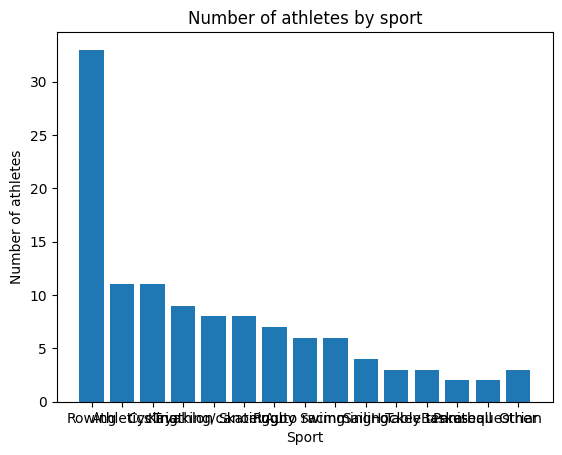

In [75]:
import matplotlib.pyplot as plt

sport_data = {
    'Rowing': 33,
    'Athletics': 11,
    'Cycling': 11,
    'Triathlon': 9,
    'Kayaking/canoeing': 8,
    'Skating': 8,
    'Rugby': 7,
    'Auto racing': 6,
    'Swimming': 6,
    'Sailing': 4,
    'Hockey': 3,
    'Table tennis': 3,
    'Basketball': 2,
    'Para-equestrian': 2,
    'Other': 3
}

plt.bar(sport_data.keys(), sport_data.values())
plt.xlabel('Sport')
plt.ylabel('Number of athletes')
plt.title('Number of athletes by sport')
plt.show()

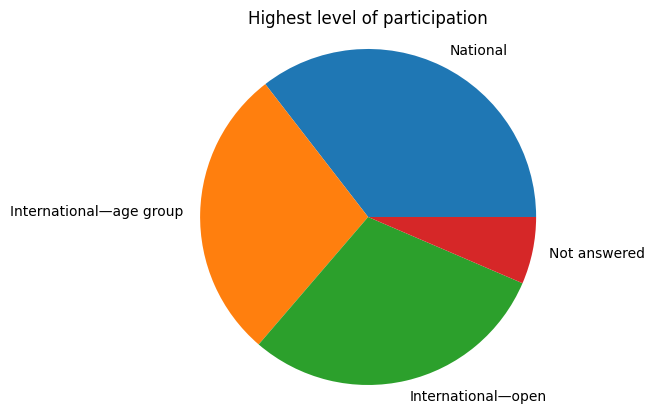

In [76]:
import matplotlib.pyplot as plt

level_data = {
    'National': 44,
    'International—age group': 35,
    'International—open': 37,
    'Not answered': 8
}

plt.pie(level_data.values(), labels=level_data.keys())
plt.axis('equal')
plt.title('Highest level of participation')
plt.show()

<Axes: >

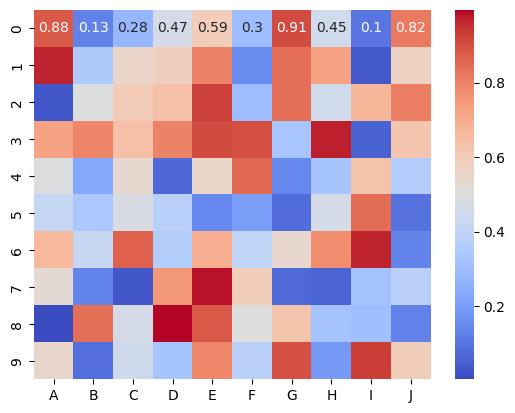

In [83]:
import seaborn as sns
import pandas as pd
import numpy as np

# Create a random correlation matrix
corr_matrix = np.random.rand(10, 10)

# Create a dataframe with the correlation matrix
df = pd.DataFrame(corr_matrix, columns=['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J'])

# Create a heatmap with seaborn
sns.heatmap(df, annot=True, cmap='coolwarm')

In [150]:
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
stopWords = list(sorted(ENGLISH_STOP_WORDS))

# Get the article text
import requests
from bs4 import BeautifulSoup
url = 'https://www.ncbi.nlm.nih.gov/pmc/articles/PMC10255212/'
response = requests.get(url)
soup = BeautifulSoup(response.text, 'html.parser')
text = soup.get_text()

# Remove stopwords and punctuation
import string
text = ''.join([word for word in text.split() if word.lower() not in stopWords and word not in string.punctuation])

# Count the word frequencies
word_freqs = {}
for word in text.split():
    if word not in word_freqs:
        word_freqs[word] = 0
    word_freqs[word] += 1

# Extract the most frequent words
ncolumns = 6; nrows= 10
most_freq_words = sorted(word_freqs.items(), key=lambda x: x[1], reverse=True)[:ncolumns * nrows]

# Print the most frequent words in a formatted table
print('First {} of {} most frequent words'.format(ncolumns * nrows, len(word_freqs)))
for i in range(0, len(most_freq_words), ncolumns):
    print(''.join('{:<13}'.format(word) for word, freq in most_freq_words[i:(i+ncolumns)]))

First 60 of 1 most frequent words
PageavailablePMCSkipmainpagecontentofficialwebsiteUnitedStatesgovernmentHere'sknow.govmeansit’sofficial.Federalgovernmentwebsitesend.gov.mil.sharingsensitiveinformation,makesureyou’refederalgovernmentsite.sitesecure.https://ensuresconnectingofficialwebsiteinformationprovideencryptedtransmittedsecurely.LogaccountinfoCloseAccountLoggedas:usernameDashboardPublicationsAccountsettingsLogAccesskeysNCBIHomepageMyNCBIHomepageMainContentMainNavigationPageavailableaccessPubMedCentralblockedusingautomatedprocessretrievecontentPMC,violationtermsPMCCopyrightNotice.Reason:Automatedretrievaluseragent"python-requests/2.23.0".URL:https://www.ncbi.nlm.nih.gov/pmc/articles/PMC10255212/MessageID:991712160Time:2024/04/3016:29:50UsePMCfree,complytermsCopyrightNoticePMCsite.additionalinformation,requestIPaddressunblocked,sendemailPMC.requestsunblocked,includeinformationboxmessage.PMCHomeSupportcenterSearchPMCFull-TextArchiveSearchPMCFollowNCBITwitterFacebookLinkedInGitHubCon

In [159]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Read the HTML file
df = pd.read_html('TEXTFILE 1.html')[0]

# Check the column names
print(df.columns)

# Extract the variable data
variable_data = df.set_index('Variable')['Participants, n (%)'].to_dict()

# Convert the variable data to text data
text_data = [value for key, value in variable_data.items()]

# Create a TF-IDF vectorizer
vectorizer = TfidfVectorizer()

# Fit the vectorizer to the text data
X = vectorizer.fit_transform(text_data)

# Create a binary label for the variable data
label = [1] * len(text_data)

# Split the dataset into 60% training and 40% test set
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X, label, test_size=0.4, random_state=42)

# Run logistic regression model on training set
from sklearn.linear_model import LogisticRegression
logit_reg = LogisticRegression(solver='lbfgs')
logit_reg.fit(Xtrain, ytrain)

# Print confusion matrix and accuracy
from sklearn.metrics import classification_report
print(classification_report(ytest, logit_reg.predict(Xtest)))

Index(['Variable', 'Variable.1', 'Participants, n (%)'], dtype='object')


ValueError: np.nan is an invalid document, expected byte or unicode string.

In [178]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

analyzer = SentimentIntensityAnalyzer()

def get_sentiment(text):
    scores = analyzer.polarity_scores(text)
    sentiment = 1 if scores['pos'] > 0 else 0
    return sentiment

df['Sentiment'] = df['Preprocessed Text'].apply(get_sentiment)

KeyError: 'Preprocessed Text'

In [113]:
import pandas as pd

# Read in the HTML files as tables using pandas
table1 = pd.read_html('TEXTFILE 1.html')[0]
table3 = pd.read_html('TEXTFILE 3.html')[0]
table4 = pd.read_html('TEXTFILE 4.html')[0]

# Display the first few rows of each table
print(table1.head())
print(table3.head())
print(table4.head())

       Variable                      Variable.1 Participants, n (%)
0  Age in years                             NaN                 NaN
1           NaN  Median (25th, 75th percentile)       22.0 (18, 27)
2        Gender                             NaN                 NaN
3           NaN                          Female           68 (54.8)
4           NaN                            Male           50 (40.3)
      Session Variable Unnamed: 1 In Person Group Session, n (%)  \
0  People in session a        NaN                            NaN   
1                  NaN        1–5                      39 (31.5)   
2                  NaN       6–10                      55 (44.4)   
3                  NaN      11–20                      26 (21.0)   
4                  NaN      21–30                        4 (3.2)   

  Online Session, n (%)  
0                   NaN  
1             21 (16.9)  
2             39 (31.5)  
3             38 (30.6)  
4             13 (10.5)  
           Unnamed: 0      

In [119]:
table1[['Variable', 'Participants, n (%)']]

,Variable,"Participants, n (%)"
0,Age in years,NaN
1,Median,"22.0 (18, 27)"
2,Gender,NaN
3,Median,68 (54.8)
4,Median,50 (40.3)
...,...,...
58,Median,41 (33.1)
59,Median,37 (29.8)
60,Median,24 (19.4)
61,Median,14 (11.3)


In [121]:
import pandas as pd

# Read in the HTML file as a table using pandas
table1 = pd.read_html('TEXTFILE 1.html')[0]

# Define a dictionary of replacement values
replacement_values = {'Variable': 'Median'}

# Replace missing values in the specified column
table1['Variable'] = table['Variable'].fillna(replacement_values['Variable'])

# Display the updated table
print(table1)

        Variable                      Variable.1 Participants, n (%)
0   Age in years                             NaN                 NaN
1         Median  Median (25th, 75th percentile)       22.0 (18, 27)
2         Gender                             NaN                 NaN
3         Median                          Female           68 (54.8)
4         Median                            Male           50 (40.3)
..           ...                             ...                 ...
58        Median                          1 to 3           41 (33.1)
59        Median                          3 to 5           37 (29.8)
60        Median                         5 to 10           24 (19.4)
61        Median                         10 plus           14 (11.3)
62        Median                    Not answered             8 (6.5)

[63 rows x 3 columns]


In [126]:
replacement_values = {'Variable' 'Years competing at Tier 3 or Tier 4', 'row58'}
print(table1)

        Variable                      Variable.1 Participants, n (%)
0   Age in years                             NaN                 NaN
1         Median  Median (25th, 75th percentile)       22.0 (18, 27)
2         Gender                             NaN                 NaN
3         Median                          Female           68 (54.8)
4         Median                            Male           50 (40.3)
..           ...                             ...                 ...
58        Median                          1 to 3           41 (33.1)
59        Median                          3 to 5           37 (29.8)
60        Median                         5 to 10           24 (19.4)
61        Median                         10 plus           14 (11.3)
62        Median                    Not answered             8 (6.5)

[63 rows x 3 columns]


In [132]:
import pandas as pd

# Read in the HTML file as a table using pandas
table = pd.read_html('TEXTFILE 1.html')[0]

# Edit the value in the cell at row index 58 and column name 'Variable'
table.at[58, 'Variable'] = 'Years competing Tier 3'

# Display the updated table
print(table)

                  Variable                      Variable.1 Participants, n (%)
0             Age in years                             NaN                 NaN
1                      NaN  Median (25th, 75th percentile)       22.0 (18, 27)
2                   Gender                             NaN                 NaN
3                      NaN                          Female           68 (54.8)
4                      NaN                            Male           50 (40.3)
..                     ...                             ...                 ...
58  Years competing Tier 3                          1 to 3           41 (33.1)
59                     NaN                          3 to 5           37 (29.8)
60                     NaN                         5 to 10           24 (19.4)
61                     NaN                         10 plus           14 (11.3)
62                     NaN                    Not answered             8 (6.5)

[63 rows x 3 columns]


In [137]:
import pandas as pd

# Read the HTML file
df = pd.read_html('TEXTFILE 1.html')[0]

# Extract the variable data
variable_data = df.set_index('Variable')['Participants, n (%)'].to_dict()

# Print the variable data
print(variable_data)

{'Age in years': nan, nan: '8 (6.5)', 'Gender': nan, 'Highest education level a': nan, 'Current living situation': nan, 'Food purchasing responsibility': nan, 'Food preparation/cooking responsibility': nan, 'Special dietary requirements c': nan, 'Sport d': nan, 'Highest level of participation': nan, 'Years competing at Tier 3 or Tier 4 e': nan}


In [143]:
import pandas as pd

# Read the HTML file
df = pd.read_html('TEXTFILE 1.html')[0]

# Check the column names
print(df.columns)

# Extract the variable data
variable_data = df.set_index('Variable')['Participants, n (%)'].to_dict()

# Print the variable data
print(variable_data)

Index(['Variable', 'Variable.1', 'Participants, n (%)'], dtype='object')
{'Age in years': nan, nan: '8 (6.5)', 'Gender': nan, 'Highest education level a': nan, 'Current living situation': nan, 'Food purchasing responsibility': nan, 'Food preparation/cooking responsibility': nan, 'Special dietary requirements c': nan, 'Sport d': nan, 'Highest level of participation': nan, 'Years competing at Tier 3 or Tier 4 e': nan}


In [155]:
variable_data['Test'] = 10
variable_data['Highest Education Level'] = variable_data.pop('Highest education level a')

In [162]:
with open('TEXTFILE 1.html', 'r') as f:
    table1 = f.read()

In [163]:
variable_data = {}
with open("TEXTFILE 1.html", "r") as file:
    for line in file:
        if "Variable" in line:
            variable = line.strip().split("</td>")[0].split(">")[1]
        if "Participants, n (%)" in line:
            participants = line.strip().split("</td>")[0].split(">")[1]
            variable_data[variable] = participants

In [164]:
import pytrends
from pytrends.request import TrendReq
import pandas as pd
# Configuring connection
pytrend = TrendReq()

In [179]:
## linecharts 
pd.options.plotting.backend = "plotly"
fig = interest_over_time_df[kw_list].plot()
fig.update_layout(
    title_text='Search volume over time',
    legend_title_text='Search terms'
)
fig.show()

In [33]:
import plotly.graph_objects as go
start_time = '2024-01-01'
end_time = '2024-03-31'
df = interest_over_time_df.loc[
    (interest_over_time_df.index >= start_time) & (interest_over_time_df.index < end_time)
]
fig = go.Figure()
for kw in kw_list:
    fig.add_trace(go.Bar(
        x=df.index.astype(str),
        y=df[kw],
        name=kw
    ))
fig.update_layout(
    barmode='group',
    xaxis_tickangle=-45,
    title_text=f'Search volume between {start_time} and {end_time}',
    legend_title_text='Search terms'
)
fig.show()